## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
complete = pd.merge(mouse_metadata,study_results,on='Mouse ID',how='left')

# Display the data table for preview
complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Mean of Tumor Volume based on Drug 
summary_df = complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
avg_tumor_df = summary_df.mean()

#Median of Tumor Volume based on Drug 
median_tumor_df= summary_df.median()

#Variance of Tumor Volume based on Drug 
var_tumor_df= summary_df.var()

#Standard Deviation of Tumor Volume based on Drug 
std_tumor_df= summary_df.std()

#SEM of Tumor Volume based on Drug 
sem_tumor_df= summary_df.sem()

#Summary Statistics Table
summary_statistics_table = pd.DataFrame({"Mean Tumor Volume":avg_tumor_df,
                              "Median Tumor Volume":median_tumor_df,
                              "Tumor Volume Variance":var_tumor_df,
                              "Tumor Volume Std. Dev.":std_tumor_df,
                              "Tumor Volume Std. Err.":sem_tumor_df})

summary_statistics_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar plots

Text(0, 0.5, 'Number of Data Points')

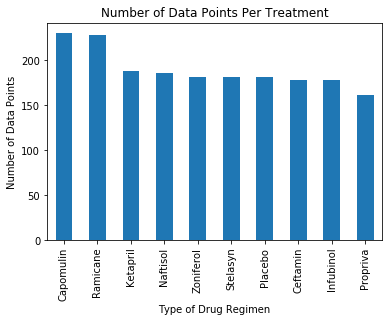

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
point_count = complete["Drug Regimen"].value_counts()
point_count.head()

point_count.plot(kind='bar')
plt.title("Number of Data Points Per Treatment")
plt.xlabel("Type of Drug Regimen")
plt.ylabel("Number of Data Points")

Text(0, 0.5, 'Number of Data Points')

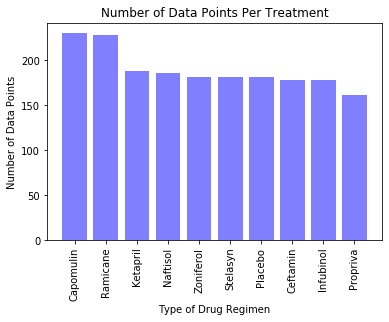

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
point_count = complete["Drug Regimen"].value_counts()
point_count.head()

plt.bar(point_count.index.values, point_count.values, color='b', alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.title("Number of Data Points Per Treatment")
plt.xlabel("Type of Drug Regimen")
plt.ylabel("Number of Data Points")

## Pie plots

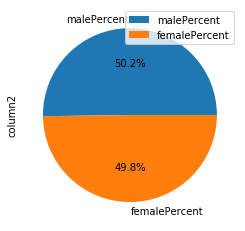

In [6]:
#Percentage of mice gender 
total_count=complete['Mouse ID'].nunique()
total_count

#Count and percentage of males
male1= complete.groupby(['Sex']).get_group(('Male'))
male2= len(male1['Mouse ID'].unique())
malePercent=(male2/total_count)

#Count and percentage of females
female1= complete.groupby(['Sex']).get_group(('Female'))
female2= len(female1['Mouse ID'].unique())
femalePercent=(female2/total_count)

# Generate a pie plot showing the distribution of female versus male mice using pandas
values={"malePercent":malePercent,"femalePercent":femalePercent}
df=pd.DataFrame(list(values.items()), columns=['column1','column2'])
df=df.set_index('column1')
df.plot(kind='pie', y='column2',autopct="%1.1f%%")

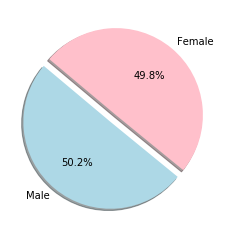

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Mouse Data for Pie 
genders = ["Male","Female"]
gender_percent = [malePercent, femalePercent]
colors = ["lightblue","pink"]
explode = (0.1,0)

plt.pie(gender_percent, explode=explode, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

## Quartiles, outliers and boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

final_tumor_vol= complete.groupby(["Mouse ID"]).max()
final_tumor_vol=final_tumor_vol.reset_index()
final_tumor_vol

merge_df = final_tumor_vol[["Mouse ID","Timepoint"]].merge(complete, on=["Mouse ID","Timepoint"], how='left')
#merge_df=merge_df.sort_values('Tumor Volume (mm3)').head(50)
#merge_df=merge_df.groupby('Drug Regimen').mean().sort_values('Tumor Volume (mm3)').reset_index()

#Tumor Volume Drug Regimen is Ramicane, Capomulin, Propriva, and Ceftamin
ramicane = merge_df[merge_df['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)']
capomulin = merge_df[merge_df["Drug Regimen"] =='Capomulin']['Tumor Volume (mm3)']
propriva = merge_df[merge_df["Drug Regimen"] == 'Propriva']['Tumor Volume (mm3)']
ceftamin = merge_df[merge_df["Drug Regimen"] == 'Ceftamin']['Tumor Volume (mm3)']


In [41]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Ramicane
ramQ1 = ramicane.quantile(0.25)
ramQ3 = ramicane.quantile(0.75)
ramIQR = ramQ3 - ramQ1

ram_low = ramQ1 - (1.5*ramIQR)

ram_high = ramQ3 + (1.5*ramIQR)

print(f"For Ramicane values below {ram_low} could be outliers.")
print(f"For Ramicane values above {ram_high} could be outliers.")

#Capomulin 
capQ1 = capomulin.quantile(0.25)
capQ3 = capomulin.quantile(0.75)
capIQR = capQ3 - capQ1

cap_low = capQ1 - (1.5*capIQR)

cap_high = capQ3 + (1.5*capIQR)

print(f"For Capomulin  values below {cap_low} could be outliers.")
print(f"For Capomulin values above {cap_high} could be outliers.")

#Propriva
proQ1 = propriva.quantile(0.25)
proQ3 = propriva.quantile(0.75)
proIQR = proQ3 - proQ1

pro_low = proQ1 - (1.5*proIQR)

pro_high = proQ3 + (1.5*proIQR)

print(f"For Propriva  values below {pro_low} could be outliers.")
print(f"For Propriva values above {pro_high} could be outliers.")

#Ceftamin
cefQ1 = ceftamin.quantile(0.25)
cefQ3 = ceftamin.quantile(0.75)
cefIQR = cefQ3 - cefQ1

cef_low = cefQ1 - (1.5*cefIQR)

cef_high = cefQ3 + (1.5*cefIQR)

print(f"For Ceftamin  values below {cef_low} could be outliers.")
print(f"For Ceftamin values above {cef_high} could be outliers.")



For Ramicane values below 17.912664470000003 could be outliers.
For Ramicane values above 54.30681135 could be outliers.
For Capomulin  values below 20.70456164999999 could be outliers.
For Capomulin values above 51.83201549 could be outliers.
For Propriva  values below 28.95110303500001 could be outliers.
For Propriva values above 82.742745555 could be outliers.
For Ceftamin  values below 25.355449580000002 could be outliers.
For Ceftamin values above 87.66645829999999 could be outliers.


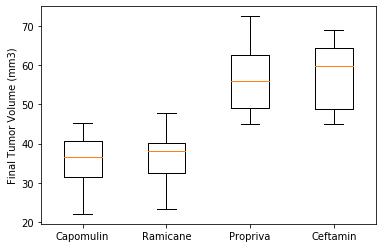

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([ramicane,capomulin,propriva,ceftamin],labels=['Capomulin','Ramicane','Propriva','Ceftamin'])
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and scatter plots

In [55]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulinTable = complete.loc[complete['Drug Regimen'] == "Capomulin"]
capomulinTable

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


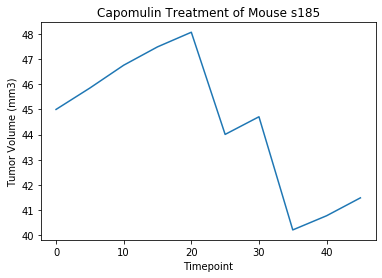

In [56]:
mouse = capomulinTable.loc[capomulinTable['Mouse ID']== 's185']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse s185')
plt.show()

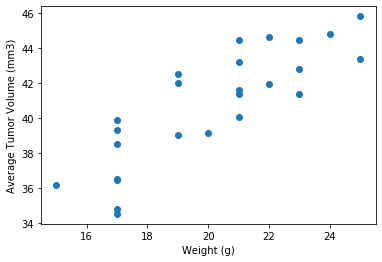

In [61]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulinTable = complete.loc[complete['Drug Regimen'] == "Capomulin"]
capomulinMean = capomulinTable.groupby(['Mouse ID']).mean()
plt.scatter(capomulinMean['Weight (g)'],capomulinMean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume')
plt.show()

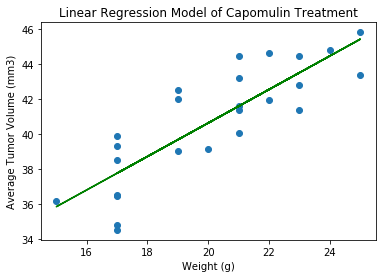

In [67]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capomulinMean['Weight (g)'],capomulinMean['Tumor Volume (mm3)'])[0],2)
corr
#.84

model = st.linregress(capomulinMean['Weight (g)'],capomulinMean['Tumor Volume (mm3)'])
y_values = capomulinMean['Weight (g)']*model[0]+model[1]
plt.scatter(capomulinMean['Weight (g)'],capomulinMean['Tumor Volume (mm3)'])
plt.plot(capomulinMean['Weight (g)'],y_values,color="green")
plt.title('Linear Regression Model of Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()